In [1]:
# load important libraries 
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

## 1- Gathering our data

In [2]:
# step 1 upload twitter-archive-enhanced.csv manually and then read csv file by pandas
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# step 2 Use download image-predictions.tsv using requests from udacity server (as per the project details)
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
# then read tsv file by pandas with separator '\t' as it is .tsv
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# step 3 use twitter APIs to query data by twitterID from twitter_archive


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# creating my API object
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


# set start time
start = timer()

# query each tweet id and return json encoding ext file with data
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file) 
            file.write('\n') # add new line
        except tweepy.TweepError as e:
            print(tweet_id, e)
            pass

# set end time
end = timer()

print(end - start)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
812747805718642688 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No sta

In [6]:
# extract the keys avalibel in tweet_json.txt
with open('tweet_json.txt')as file:
    for line in file:
        data = json.loads(line)
        print(data.keys())
        break

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [7]:
# create dataframe with data extracted from tweet_json.txt
tweetdata_api = []
with open('tweet_json.txt')as file:
    for line in file:
        data = json.loads(line)
        tweetdata_api.append({'created_at': data['created_at'], 
                           'tweet_id': data['id'],
                           'retweet_count': data['retweet_count'],
                           'favorite_count': data['favorite_count']})

tweetdata_api = pd.DataFrame(tweetdata_api, columns=['created_at','tweet_id','retweet_count','favorite_count'])

# save the tweetdata_api dataframe to csv file
tweetdata_api.to_csv('tweetdata_api.csv', index = False)

## 2- Assessing out datafarmes

In [7]:
# info about twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
# number of unique tweetids in twitter_archive and duplicates
twitter_archive.tweet_id.nunique(), twitter_archive.duplicated().sum()

(2356, 0)

In [10]:
# rating_numerator values
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
# count of rating_numerator > 19
twitter_archive[twitter_archive.rating_numerator > 19].tweet_id.count()

25

In [12]:
# rating_denominator values
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
# count of rating_denominator != 10
twitter_archive[twitter_archive.rating_denominator != 10].tweet_id.count()

23

In [14]:
# source list of values
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# dogs name with start with lower case
twitter_archive[twitter_archive['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [16]:
# info about twitter_archive
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.jpg_url

0         https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1         https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2         https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
3         https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
4         https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
5         https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
6         https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg
7         https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg
8         https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
9         https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg
10        https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
11        https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
12        https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg
13        https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
14        https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg
15        https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg
16        https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
17        http

In [18]:
# number of unique tweetids in image_predictions and duplicates
image_predictions.tweet_id.nunique(), image_predictions.duplicated().sum()

(2075, 0)

In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [21]:
tweetdata_api = pd.read_csv('tweetdata_api.csv')
tweetdata_api

,created_at,tweet_id,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,8321,38047
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,6148,32668
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,4068,24581
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,8470,41406
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,9163,39571
5,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,3049,19872
6,Fri Jul 28 16:27:12 +0000 2017,890971913173991426,2019,11618
7,Fri Jul 28 00:22:40 +0000 2017,890729181411237888,18466,64203
8,Thu Jul 27 16:25:51 +0000 2017,890609185150312448,4188,27313
9,Wed Jul 26 15:59:51 +0000 2017,890240255349198849,7219,31332


In [22]:
# info about tweetdata_api
tweetdata_api.info()

# once there is no duplicates in twitter_archive we can be sure that no duplicates in tweetdata_api

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
created_at        2340 non-null object
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


**Quality**

1. timestamp in twitter_archive is not datetime formate.
2. retweeted_status_id and other columns in twitter_archive are almost null columns with only 181 or 75 record each.
3. rating_numerator have extreme values over 19 (I'll set 19 as the maximum).
4. rating_denominator have extreme values over 10.
5. text in twitter_archive contains url.
6. source in twitter_archive is not well represented.
7. wrong dogs name in twitter_archive were posted as lower case(a, an, just, actually...) and None instead of null 
8. jpg_url column in image_predictions have some 'ext_tw_video_thumb' which can not be displayed
9. created_at in tweetdata_api is not datetime formate and is similar to timestamp in twitter_archive

**Tidy**

1. data were distributed between more than 1 dataframe and needs to be consolidated
2. dog stages in twitter_archive used 4 column (doggo, floofer, pupper, puppo)                         

## Cleaning

In [23]:
# create copies of dataframes
tw_archive_clean = twitter_archive.copy()
image_pre_clean = image_predictions.copy()
tweet_api_clean = tweetdata_api.copy()

## First Quality issues

1. timestamp:

convert timestamp column in tw_archive_clean to datetime format

In [24]:
tw_archive_clean['timestamp'] = pd.to_datetime(tw_archive_clean['timestamp'])

2. non-valuable columns:

drop columns that contains very view observations (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [25]:
tw_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                       'retweeted_status_id', 'retweeted_status_user_id', 
                       'retweeted_status_timestamp'], axis = 1, inplace = True)

In [26]:
# test
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


3. rating_numerator (25 rows)

- drop all rows for rating_numerator > 19
- change dtypes to float number

In [27]:
mask = tw_archive_clean[tw_archive_clean.rating_numerator > 19]
tw_archive_clean.drop(mask.index, inplace = True)
tw_archive_clean['rating_numerator'] = tw_archive_clean.rating_numerator.astype(float)

In [28]:
# test
(tw_archive_clean.rating_numerator > 19).sum(), tw_archive_clean.rating_numerator.dtypes

(0, dtype('float64'))

4. rating_denominator (23 rows)

change rating_denominator values to 10

In [29]:
mask2 = tw_archive_clean[tw_archive_clean.rating_denominator != 10]
tw_archive_clean.drop(mask2.index, inplace = True)

In [30]:
# test
tw_archive_clean.rating_denominator.value_counts()

10    2324
Name: rating_denominator, dtype: int64

5. text

split the text and remove the url

In [31]:
tw_archive_clean.text = tw_archive_clean.text.apply(lambda x: x.split('http')[0])

In [32]:
# test
tw_archive_clean.text.values[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

6. source in twitter_archive

replace the values to (Twitter for iPhone, vine.co, Twitter Web Client, TweetDeck)

In [33]:
old_values = tw_archive_clean.source.value_counts().index
new_values = [ 'Twitter for iPhone', 'vine.co', 'Twitter Web Client', 'TweetDeck']

tw_archive_clean.source.replace(old_values, new_values, inplace = True)

In [34]:
# test
tw_archive_clean.source.value_counts()

Twitter for iPhone    2190
vine.co                 91
Twitter Web Client      33
TweetDeck               10
Name: source, dtype: int64

7. wrong dogs name

change all lower case and None to null

In [35]:
tw_archive_clean.loc[(tw_archive_clean.name.str.islower()) | (tw_archive_clean.name == 'None'),'name'] = np.nan

In [36]:
# test
tw_archive_clean[(tw_archive_clean.name.str.islower()) | (tw_archive_clean.name == 'None') ].name.count()

0

8. jpg_url column in image_predictions

remove the jpg_url that contain 'ext_tw_video_thumb' in the url as it is not working

In [37]:
mask3 = image_pre_clean[image_pre_clean.jpg_url.str.contains('ext_tw_video_thumb')]
#image_pre_clean.drop(mask3.index, inplace = True)
image_pre_clean.drop(mask3.index, inplace = True)

In [38]:
image_pre_clean.jpg_url.str.contains('ext_tw_video_thumb').sum()

0

9. created_at in tweetdata_api

dropping created_at column better than re-inquery using twitter API

In [39]:
tweet_api_clean.drop(['created_at'], axis = 1, inplace = True)

In [40]:
# test
tweet_api_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## Second Tidy issuess

1. data were distributed between more than 1 dataframe 

merge 3 dataframes in 1 using tweet_id column

In [41]:
first_merge = tw_archive_clean.merge(image_pre_clean, how='inner', on = 'tweet_id')
final_data = first_merge.merge(tweet_api_clean , how='inner', on = 'tweet_id')

In [42]:
# test
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 25 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1353 non-null object
doggo                 1968 non-null object
floofer               1968 non-null object
pupper                1968 non-null object
puppo                 1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null bool
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null bool
p3                    1968 no

2. dog stages in twitter_archive used 4 column (doggo, floofer, pupper, puppo)

change None in 4 column of the dogs breed to null the melt the 4 columns to 1 column

In [43]:
# create list with stages name
stage = ['doggo', 'floofer', 'pupper', 'puppo']

# for loop to change None to null
for i in stage:
    final_data.loc[final_data[i] == 'None', i ] = np.nan

In [44]:
# use melt func to create 1 stage column instead of 4 column and then drop the variable column
final_data = pd.melt(final_data, id_vars = final_data.columns.difference(['doggo', 'floofer', 'pupper', 'puppo']),
                     value_vars= ['doggo', 'floofer', 'pupper', 'puppo'],
                     value_name= 'stage')

final_data.drop(['variable'], axis = 1, inplace = True)

In [45]:
# drop duplicates after dropping variable column to clean our dataframe
final_data.drop_duplicates(inplace = True)

In [46]:
# test
final_data.shape

(2280, 22)

In [47]:
# once date not clean yet
# getting the duplicated_id to drop it
duplicated_id = final_data[final_data.tweet_id.duplicated()].tweet_id

# assure to drop the row eith null stage
duplicated_row = final_data.loc[final_data.tweet_id.isin(duplicated_id) & final_data.stage.isnull()]

# drop the duplicated_row
final_data.drop(duplicated_row.index, inplace = True)

In [48]:
# test
final_data.shape

(1980, 22)

In [49]:
# drop the duplicated_row that contain non null stage data
final_data.drop(final_data[final_data.tweet_id.duplicated()].index, inplace = True)

In [50]:
# test
final_data.shape

(1968, 22)

## Storing

In [51]:
# store final cleaned dataframe to twitter_archive_master.csv as per project details
final_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing, and Visualizing

**First:** Interaction with WeRateDogs twitter account over time:

In [52]:
final_data = pd.read_csv('twitter_archive_master.csv')

Text(0,0.5,'Post count')

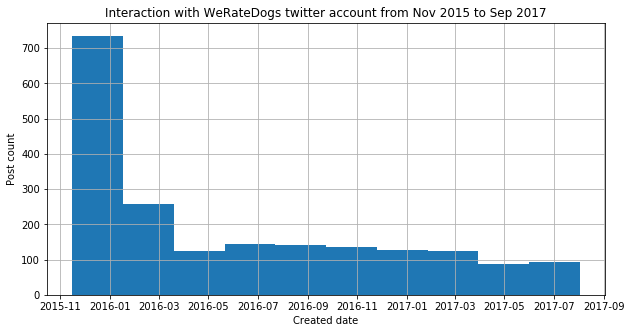

In [53]:
# set the to_datetime to ignor error
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'], errors='coerce')

final_data.timestamp.hist(figsize=(10, 5))
plt.title('Interaction with WeRateDogs twitter account from Nov 2015 to Sep 2017')
plt.xlabel('Created date')
plt.ylabel('Post count')

Date from November 2015 to January 2016 was the most active time to WeRateDogs twitter account

([<matplotlib.axis.XTick at 0x7fba5e7ab208>,
 <a list of 13 Text xticklabel objects>)

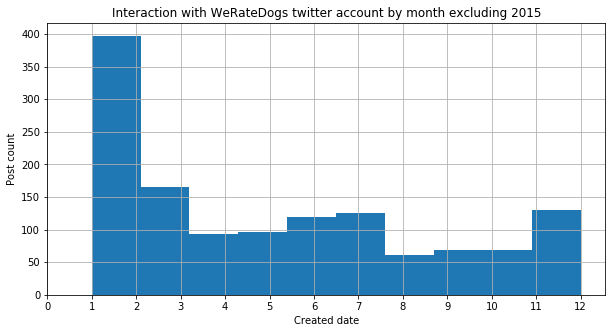

In [54]:
# same pervious plot but according to months and excluding 2015
final_data[final_data.timestamp > '2015-12-31'].timestamp.dt.month.hist(figsize=(10, 5))
plt.title('Interaction with WeRateDogs twitter account by month excluding 2015')
plt.xlabel('Created date')
plt.ylabel('Post count')
plt.xticks(np.arange(13))

Most active months that have interaction with WeRateDogs twitter account are January and February (excluding 2015)

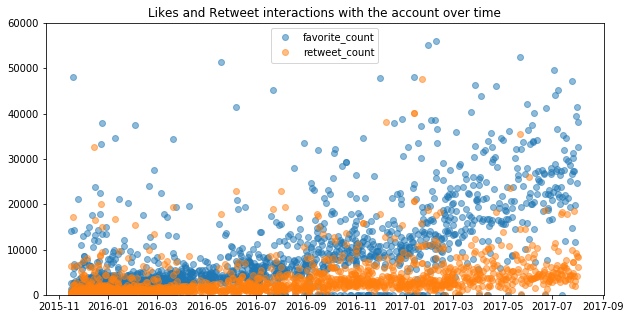

In [55]:
# scatter plot shows the interaction of likes and retweet with the account
import matplotlib.ticker as ticker

fig, axs = plt.subplots(figsize=(10, 5))
axs.plot_date(final_data.timestamp, final_data.favorite_count, xdate = True, alpha = 0.5)
axs.plot_date(final_data.timestamp, final_data.retweet_count, xdate = True, alpha = 0.5)
plt.ylim(0,60000)
plt.title('Likes and Retweet interactions with the account over time')
plt.legend()


Obviously likes have been increased over time but retweets slightly increased

**Second:** Relationship between Likes and Retweet

Text(0,0.5,'Retweet Count')

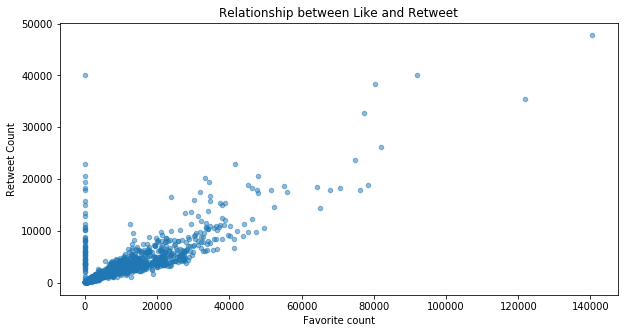

In [56]:
final_data.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, figsize = (10,5))
plt.title('Relationship between Like and Retweet')
plt.xlabel('Favorite count')
plt.ylabel('Retweet Count')

Strong positive relation between likes and retweets

In [57]:
# count of posts with 0 likes and have been retweeted
final_data[final_data['favorite_count'] == 0].retweet_count.count(), final_data[final_data['favorite_count'] == 0].retweet_count.sum()

(72, 467137)

**Third:** Analyzing most favorite dog breed and stage

Text(0.5,1,'Dogs breed that have more than 15 post')

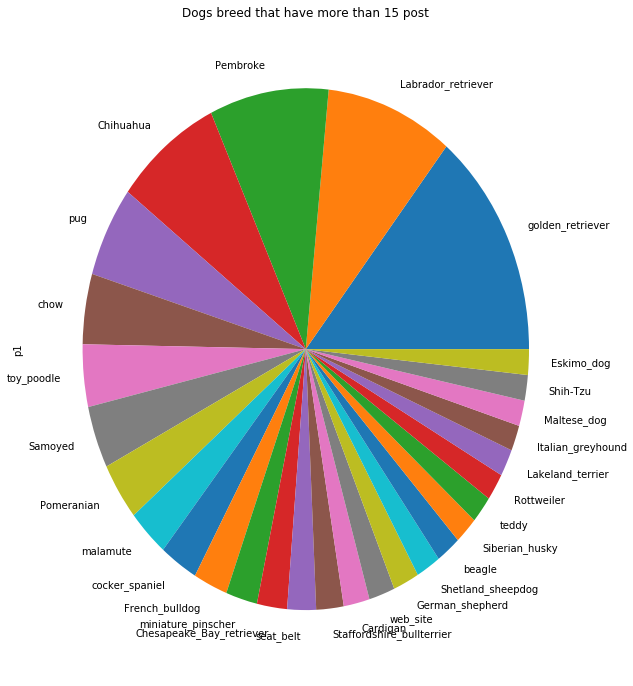

In [58]:
# creating data for dogs breed that have post more than 15 post
dog_breed = final_data.p1.value_counts()

dog_breed[dog_breed > 15].plot(kind = 'pie', figsize = (10, 12))
plt.title('Dogs breed that have more than 15 post')

Most reoccurred dog breeds were Golden retriever, Labrador retriever, Pembroke, Chihuahua and Pug

Text(0.5,0.98,'Dog stage plotting')

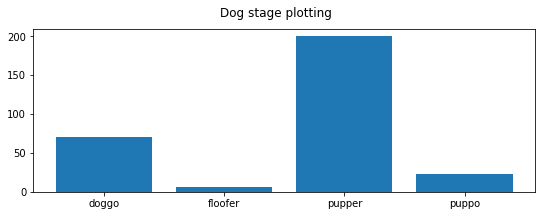

In [59]:
names = list(final_data.stage.value_counts().index)
values = list(final_data.stage.value_counts())
fig, axs = plt.subplots( figsize=(9, 3), sharey=True)
axs.bar(names, values)

fig.suptitle('Dog stage plotting')

Pupper dogs has the most occurrence in WeRateDogs twitter account

**Fourth:** Rating ratio

In [60]:
# creating ratio column
final_data['rating'] = final_data.rating_numerator/final_data.rating_denominator

Text(0,0.5,'Frequency')

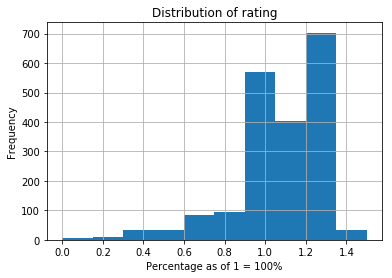

In [61]:
final_data.rating.hist()
plt.title('Distribution of rating')
plt.xlabel('Percentage as of 1 = 100%')
plt.ylabel('Frequency')

Most of the rating between 100% and 130%

Text(0,0.5,'Rating')

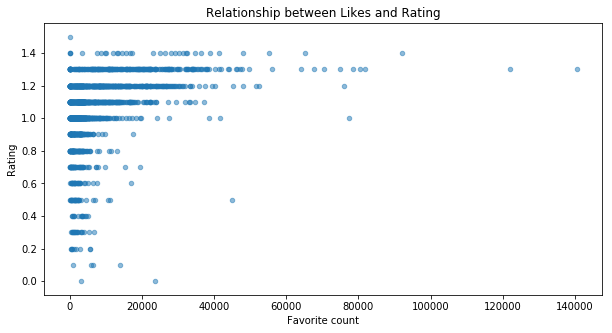

In [62]:
final_data.plot(kind = 'scatter', x = 'favorite_count', y= 'rating', alpha = 0.5, figsize = (10,5))
plt.title('Relationship between Likes and Rating')
plt.xlabel('Favorite count')
plt.ylabel('Rating')

Very strong relationship between rating and likes (which was highly expected).